# RT

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!cat '/content/gdrive/My Drive/experiments/001-exp/scripts/reader.py'

import codecs
import os
import time
import csv
import sys

from enum import Enum
from collections import Counter
from razdel import tokenize
from razdel import sentenize

from nltk.corpus.reader.api import CorpusReader
from nltk.corpus.reader.api import CategorizedCorpusReader


class PathPattern(Enum):

    doc_pattern = r".*\.csv"
    cat_pattern = r"(\w+)/*"


class CSVCorpusReader(CategorizedCorpusReader, CorpusReader):
    """
    Объект чтения csv файлов для получения возможности
    дополнительной предварительной обработки.
    """

    def __init__(self, root, fileids=PathPattern.doc_pattern.value, encoding='utf8', **kwargs):
        """
        Инициализирует объект чтения промежуточного обработанных файлов
        корпуса.
        """

        # Добавить шаблон категорий, если он не был передан в класс явно
        if not any(key.startswitch('cat_') for key in kwargs.keys()):
            kwargs['cat_pattern'] = PathPattern.cat_pattern.value

        # Инициализировать объекты

In [3]:
!ls /content/gdrive/My\ Drive/experiments/001-exp/scripts/*.py

'/content/gdrive/My Drive/experiments/001-exp/scripts/reader.py'


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/experiments/001-exp/scripts/')

In [5]:
!pip install razdel

In [0]:
from string import punctuation
from collections import Counter
import datetime
import matplotlib.pyplot as plt

In [0]:
import sys

In [0]:
sys.path.append('C:\\projects\\datascience\\proj_news_viz\\nlp\\experiments\\exp-001_Prepare_csv_for_EDA\\scripts')

In [0]:
from reader import CSVCorpusReader

In [0]:
# Создадим объект чтения корпуса
# data = CSVCorpusReader('../../../data/interim')
data = CSVCorpusReader('/content/gdrive/My Drive/data/interim/')

In [9]:
# Новостные источники
data.categories()

['gazeta', 'interfax', 'rt', 'tass']

In [10]:
# Имеющиеся файлы в корпусе
data.fileids()

['gazeta/gazeta.csv', 'interfax/interfax.csv', 'rt/rt.csv', 'tass/tass.csv']

## Общий предварительный анализ

In [11]:
# Предварительный анализ всех файлов из каталога новостного источника
data.describe(None, 'rt')

{'Время обработки в секундах': 199.11666059494019,
 'Количество источников новостей': 1,
 'Количество обработанных новостей': 106644,
 'Количество повторяющихся новостей': 293,
 'Количество предложений': 510837,
 'Количество пустных новостных элементов': 12,
 'Количество слов': 19411353,
 'Количество токенов (словарь)': 384046,
 'Количество файлов': 1,
 'Конечная дата в обработке': '2019-08-02 14:10:00',
 'Коэффициент лексического разнообразия (lexical diversity)': 50.544343646334035,
 'Начальная дата в обработке': '2014-06-16 18:36:02',
 'Среднее количество новостей по отношению к файлам': 106644.0,
 'Среднее количество предложений в новостях': 4.790114774389558}

## EDA

In [0]:
list_data = list(data.docs(None, 'rt'))

In [13]:
# Так выглядет датасет RT
list_data[:5]

[OrderedDict([('date', '2019-06-26 14:00:00'),
              ('url',
               'https://russian.rt.com/russia/news/644595-avto-ekspert-rossiya'),
              ('edition', '-'),
              ('topics', 'Россия'),
              ('authors', ''),
              ('title',
               'Эксперт прокомментировал ситуацию с возможным лишением прав за нечитаемые номера'),
              ('text',
               'Как считает эксперт, россиянам не стоит переживать, что их заподозрят в намеренном загрязнении госзнака в непогоду.n«Когда идёт дождь или снег, то у водителя нет никакого умысла, чтобы номер был грязным, — он сам по себе такой. В теории в идеальной ситуации это должно учитываться инспекторами и судом», —nзаявилnон.nРанее пленум Верховного суда Россииnвыпустил постановлениеn, разъясняющее, какие санкции могут быть применены в отношении автолюбителей, которые приняли меры, чтобы государственные знаки, установленные на их автомобилях, стали нечитаемыми.nРуководитель Федерации автовла

In [0]:
# Можно в пандас загрузить и посмотреть

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(list_data)

In [16]:
df.head()

,date,url,edition,topics,authors,title,text,reposts_fb,reposts_vk,reposts_ok,reposts_twi,reposts_lj,reposts_tg,likes,views,comm_count,NaN
0,2019-06-26 14:00:00,https://russian.rt.com/russia/news/644595-avto...,-,Россия,,Эксперт прокомментировал ситуацию с возможным ...,"Как считает эксперт, россиянам не стоит пережи...",-,-,-,-,-,-,-,-,-,[]
1,2019-06-26 19:56:00,https://russian.rt.com/sport/article/644740-nu...,-,Спорт,,"Встреча Нурмагомедова с Макгрегором, восстанов...",«Конор может посетить поединок Хабиба с Порье»...,-,-,-,-,-,-,-,-,-,[]
2,2019-06-26 14:52:00,https://russian.rt.com/russia/news/644619-puti...,-,Россия,,Путин подарил Зюганову на юбилей материалы съе...,"Открывая заседание Госсовета в Кремле, Путин п...",-,-,-,-,-,-,-,-,-,[]
3,2019-06-26 14:44:00,https://russian.rt.com/world/news/644618-parla...,-,Мир,,"Парламентарии США, ФРГ и России проведут встре...",Об этом информируетnРИА Новостиnсо ссылкой на ...,-,-,-,-,-,-,-,-,-,[]
4,2019-06-26 14:42:00,https://russian.rt.com/sport/news/644617-mok-a...,-,Спорт,,МОК принял решение лишить признания AIBA,Решением 134-й сессии МОК в швейцарской Лозанн...,-,-,-,-,-,-,-,-,-,[]


### Обработка словаря

In [0]:
# Соберем токены
tokens = data.gettokens

In [0]:
punctuation = list(punctuation)

In [0]:
punctuation += ['«','»','—', 'n','»,','».', '–', '...']

In [0]:
garbage_words = ['nранее', 'nв', 'nпо', 'nтакже','u','n—', 'nn']

In [0]:
tokens = {item:tokens[item] for item in tokens if item not in punctuation}

In [0]:
tokens = {item:tokens[item] for item in tokens if item not in garbage_words}

In [0]:
stopwords_01 = open('/content/gdrive/My Drive/data/another/stopwords.txt', 'r', encoding='UTF-8')
stopwords_01 = stopwords_01.read().split('\n')
stopwords_02 = open('/content/gdrive/My Drive/data/another/stopwords_02.txt', 'r', encoding='UTF-8')
stopwords_02 = stopwords_02.read().split('\n')

In [0]:
stopwords = stopwords_01 + stopwords_02

In [0]:
tokens_without_stopwords = {item:tokens[item] for item in tokens if item not in stopwords}

### Аналитика по словам

#### Топ-20 слов без удаления стоп-слов

In [51]:
Counter(tokens).most_common(20)

[('в', 656403),
 ('и', 339005),
 ('на', 276070),
 ('что', 230565),
 ('с', 171243),
 ('по', 162915),
 ('не', 150149),
 ('ранее', 73704),
 ('о', 63981),
 ('как', 63264),
 ('он', 62068),
 ('для', 59815),
 ('это', 59210),
 ('к', 56653),
 ('россии', 56185),
 ('из', 55137),
 ('за', 54938),
 ('а', 52405),
 ('также', 49500),
 ('его', 46686)]

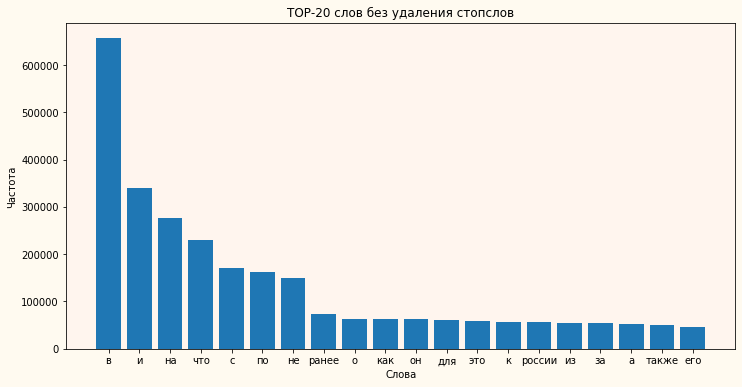

In [52]:
x = dict(Counter(tokens).most_common(20)).keys()
y = dict(Counter(tokens).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

#### Топ-20 слов после удаления стоп-слов

In [53]:
Counter(tokens_without_stopwords).most_common(20)

[('россии', 56185),
 ('сша', 38624),
 ('заявил', 30197),
 ('сообщалось', 23040),
 ('словам', 22485),
 ('новости', 21864),
 ('отметил', 21257),
 ('риа', 21067),
 ('сообщает', 18260),
 ('отмечается', 16484),
 ('украины', 16193),
 ('1', 16054),
 ('2', 16037),
 ('rt', 15362),
 ('слова', 15296),
 ('приводит', 15146),
 ('страны', 13892),
 ('цитирует', 13827),
 ('мая', 13049),
 ('решение', 12689)]

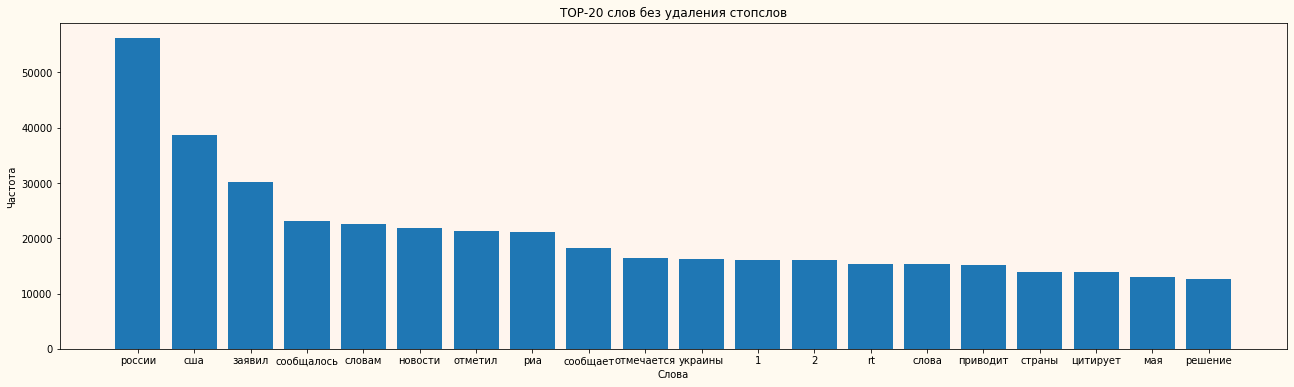

In [54]:
x = dict(Counter(tokens_without_stopwords).most_common(20)).keys()
y = dict(Counter(tokens_without_stopwords).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(22)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

## Рубрики в разрезе новостей

### Количество рубрик

In [0]:
list_topics = list(data.listcolumns(None, 'rt', 'topics'))

In [56]:
len(set(list_topics))

10

### Рубрики в разрезе количества новостей

In [57]:
Counter(list_topics).most_common(10)

[('Россия', 32963),
 ('Спорт', 26702),
 ('Мир', 26476),
 ('Бывший СССР', 10078),
 ('Без политики', 4489),
 ('Экономика', 4321),
 ('Наука', 1496),
 ('Пресс-релизы', 92),
 ('Новости партнёров', 14),
 ('Мероприятия RT', 13)]

## Распределение количества новостей по месяцам

### Удаление дубликатов

In [0]:
# Новый словарь, ключами которого будут новости, таким образом будет создан
# новый словарь, без дубликатов
news_by_dict = {i['text']: i for i in list_data}
new_items = list(news_by_dict.values())

In [25]:
# Проверь, что количество дубликатов совпало с тем, что были в предварительном анализе
# все верно
len(list_data) - len(new_items)

293

### Получение распределения

In [0]:
def getMonthDate(date):
  """
  Возвращает дату в формате ММ-ГГГГ
  """
  date = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
  return '-'.join(['0' + str(date.month) if date.month<10 else str(date.month), str(date.year)])

In [0]:
# Подсчет количества новостей в разрезе месяца и года
list_dates = [getMonthDate(x['date']) for x in new_items]

In [0]:
month_year = Counter(list_dates)

In [39]:
len(month_year)

33

In [40]:
month_year.most_common(33)

[('05-2019', 8268),
 ('12-2017', 8264),
 ('11-2018', 8131),
 ('05-2018', 8088),
 ('11-2017', 7794),
 ('06-2019', 7537),
 ('06-2017', 6998),
 ('05-2017', 6083),
 ('10-2018', 5234),
 ('12-2018', 4473),
 ('06-2018', 4302),
 ('10-2016', 3965),
 ('07-2017', 3751),
 ('04-2018', 2612),
 ('09-2016', 2315),
 ('08-2016', 2229),
 ('08-2015', 2205),
 ('07-2015', 2094),
 ('06-2015', 2020),
 ('07-2016', 1924),
 ('04-2019', 1917),
 ('12-2014', 1655),
 ('11-2014', 1390),
 ('09-2015', 1228),
 ('10-2014', 1037),
 ('11-2016', 423),
 ('09-2014', 396),
 ('07-2019', 13),
 ('08-2018', 1),
 ('09-2017', 1),
 ('08-2019', 1),
 ('08-2017', 1),
 ('06-2014', 1)]

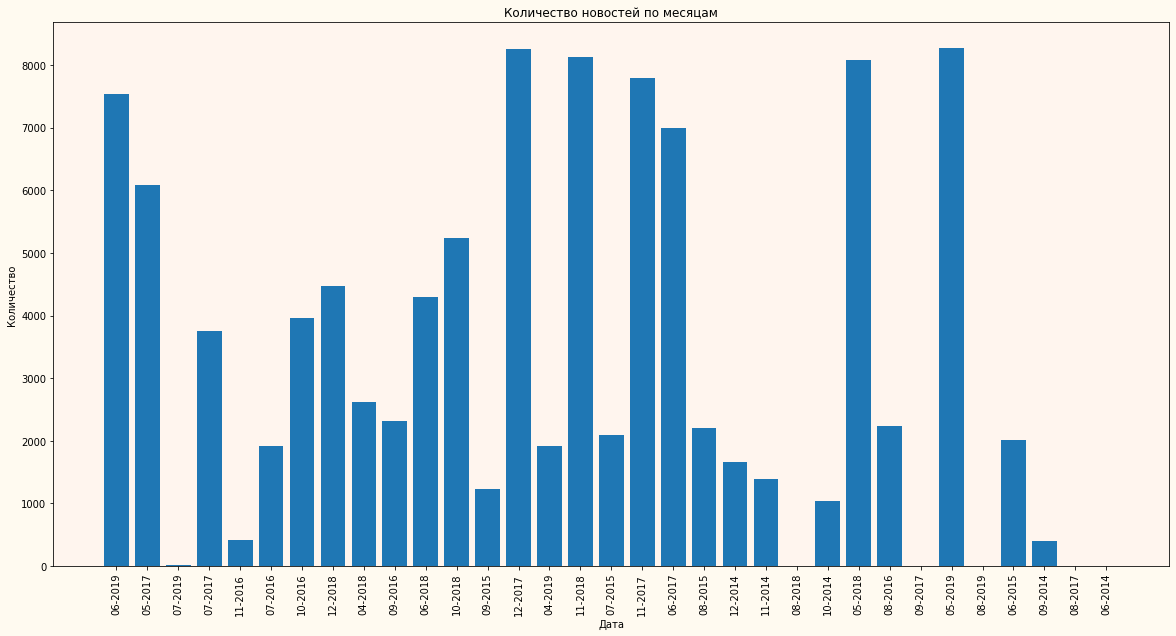

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x = month_year.keys(),
        height = month_year.values())
plt.xticks(rotation='vertical')
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

ax.set_title('Количество новостей по месяцам')
ax.set_ylabel('Количество')
ax.set_xlabel('Дата')
plt.show()